## CSV Results Processor

Graph results of climate prediction data captured via CSV data.



In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
debug = False

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_ROOT = DRIVE_PATH + "/data/"

# Journal file
JOURNAL_LOG = SCRIPT_PATH + "cv-results.csv"

# Colors for rendering
colors = 'rbygm'

In [106]:
# Visualization params
METRIC = 'MSE'

GROUP_COLS = ['TargetLabel','WindowSize','TestPct','Columns']
TGT_LABEL = 0
WIND_SIZE = 1
TEST_PCT = 2
COLS = 3

In [107]:
import glob
import os
import pandas as pd
from pathlib import Path
import numpy as np

df = pd.read_csv(JOURNAL_LOG)


In [108]:
df

,DateTime,Serial,Model,TargetLabel,NumFeatures,WindowSize,TestPct,NumEpochs,MSE,MAE,MAPE,SKMAPE,Columns
0,20231002-1141,1,LSTMv2,LandAndOceanAverageTemperature,3,60,0.3,300,0.063580,0.214751,1.357980,1.357980,"['LandAverageTemperature', 'LandMaxTemperature..."
1,20231002-1150,2,LSTMv2,LandAndOceanAverageTemperature,3,100,0.3,300,0.020820,0.114104,0.732917,0.732917,"['LandAverageTemperature', 'LandMaxTemperature..."
2,20231002-1158,3,LSTMv2,LandAndOceanAverageTemperature,3,120,0.3,300,0.024091,0.120354,0.767855,0.767855,"['LandAverageTemperature', 'LandMaxTemperature..."
3,20231002-1207,4,LSTMv2,LandAndOceanAverageTemperature,3,80,0.3,300,0.036770,0.156892,0.994934,0.994934,"['LandAverageTemperature', 'LandMaxTemperature..."
4,20231002-1220,5,LSTMv2,LandAndOceanAverageTemperature,3,110,0.3,300,0.022116,0.110428,0.715988,0.715988,"['LandAverageTemperature', 'LandMaxTemperature..."
5,20231002-1230,6,LSTMv2,LandAndOceanAverageTemperature,3,110,0.3,300,0.019771,0.111629,0.720507,0.720507,"['LandAverageTemperature', 'LandMaxTemperature..."
6,20231002-1245,7,LSTMv2,LandAndOceanAverageTemperature,3,110,0.2,300,0.031143,0.142615,0.911515,0.911515,"['LandAverageTemperature', 'LandMaxTemperature..."
7,20231002-1307,8,LSTMv2,LandAndOceanAverageTemperature,3,110,0.3,300,0.021599,0.113942,0.729142,0.729142,"['LandAverageTemperature', 'LandMaxTemperature..."
8,20231108-1949,9,LSTMv2,landSeaAvgTemp,17,60,0.2,189,0.086620,0.278919,0.017570,0.017570,"['landAvgTemp', 'landMaxTemp', 'landMinTemp', ..."
9,20231108-2354,10,LSTMv2,landSeaAvgTemp,6,60,0.2,78,0.039703,0.186905,0.011807,0.011807,"['day', 'year', 'month', 'landSeaAvgTemp', 'co..."


In [109]:
df_net = df.groupby(GROUP_COLS)[METRIC].all()

In [110]:
df_net

TargetLabel                     WindowSize  TestPct  Columns                                                                                                                                                                                     
LandAndOceanAverageTemperature  60          0.3      ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']                                                                                        True
                                80          0.3      ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']                                                                                        True
                                100         0.3      ['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']                                                                                        True
        

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# Delete rows w/o a real serial
df = df[df['Serial'] > 10]

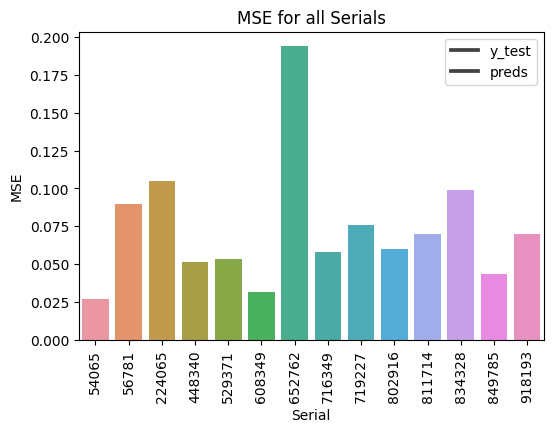

In [113]:
plt.rcParams["figure.figsize"] = [6,4]
sns.barplot(x=df['Serial'], y=df[METRIC])
#plt.plot(df[COLS])
plt.xlabel('Serial')
plt.xticks(rotation=90)
plt.ylabel(METRIC)
plt.title(f'{METRIC} for all Serials')
plt.legend(df_stats.columns)

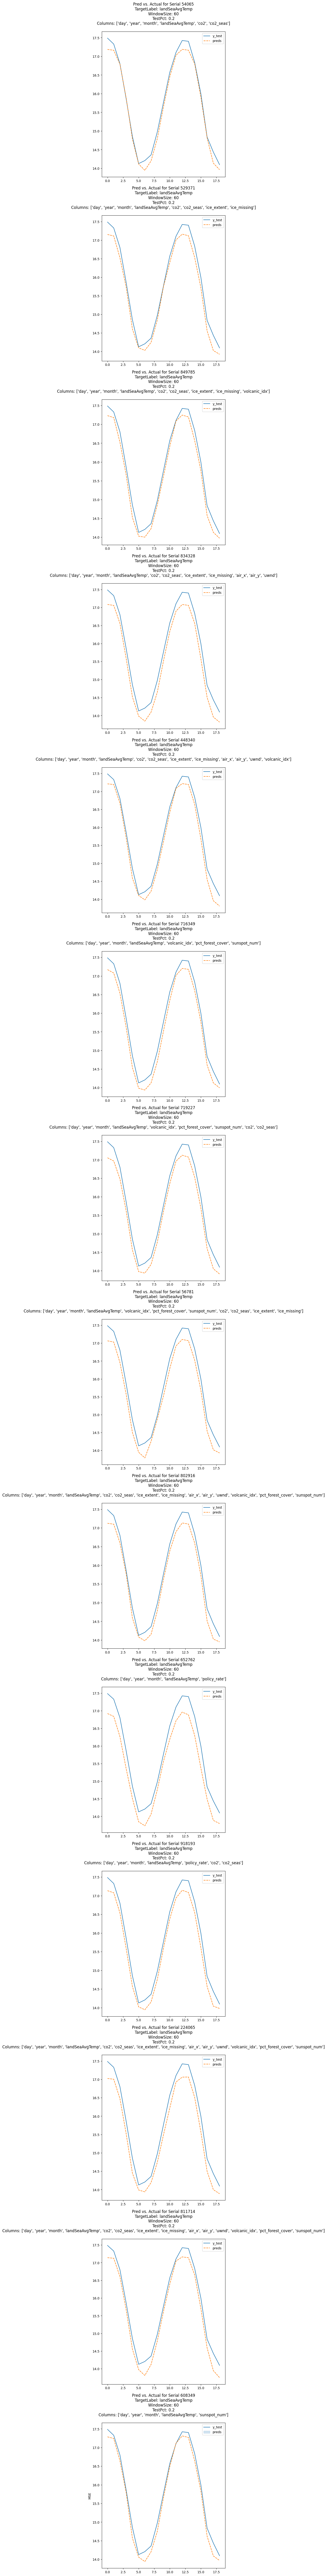

In [115]:
plt.rcParams["figure.figsize"] = [8,6]
fig, axs = plt.subplots(df.shape[0], 1, figsize=(6,111), layout="constrained")

for i,s in enumerate(df.index):
  cur_row = df.loc[s]
  serial = cur_row['Serial']
  if (serial <= 10):
    continue
  this_ax = axs[i]
  #print(serial)
  df_stats = pd.read_csv(DATA_ROOT + f'model-preds-{serial}.csv')
  df_stats.drop(columns=['Unnamed: 0'], inplace=True)
  sns.lineplot(data=df_stats, ax=this_ax)
  #plt.plot(df[COLS])
  #plt.xlabel('Date')
  plt.ylabel(METRIC)
  title_str = [f'{GROUP_COLS[t]}: {cur_row[GROUP_COLS[t]]}\n' for t in range(4)]
  title_str = ''.join(title_str)
  this_ax.set_title(f'Pred vs. Actual for Serial {serial}\n{title_str}')
  plt.legend(df_stats.columns)
